<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zad18_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np

#stworzenie modelu
input_data = tf.ones((16, 3, 3))
# sposób pierwszy

seq_model = tf.keras.Sequential()

# input_shape jest niewymagane, lecz pozwala powiedzieć,
# "chcę mieć taki rozmiar danych wejściowych", co pozwala
# uniknąć głupich pomyłek w stylu: przekazujemy inny rozmiar,
# bo zapomnieliśmy np. zmniejszyć obrazów wejściowych

seq_model.add(layers.Flatten(input_shape=[3, 3]))
seq_model.add(layers.Dense(16, name="input_layer_1"))
seq_model.add(layers.Dense(32, name="hidden_layer_1"))
seq_model.add(layers.Dense(4, name="output_layer_1"))

#sposób drugi

seq_model_2 = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(16, name="input_layer"),
    layers.Dense(32, name="hidden_layer"),
    layers.Dense(4, name="output_layer")
])

# uruchomienie naszego modelu z wygenerowanymi danymi
output = seq_model_2(input_data)
print(output)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


tf.Tensor(
[[ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]
 [ 0.5009438  -1.3431118  -1.9696522  -0.36001343]], shape=(16, 4), dtype=float32)


In [2]:
!pip install numpy

In [3]:
import numpy as np
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
list_pythonowa = [1, 2, 3, 4, 5]
dataset = tf.data.Dataset.from_tensor_slices(list_pythonowa)

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [6]:
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
f_mnist_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers # import layers module

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])

f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

f_mnist_model.summary()

train_stats = f_mnist_model.fit(train_ds, epochs=10, verbose=1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7835 - loss: 0.6091
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8614 - loss: 0.3774
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8738 - loss: 0.3378
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8880 - loss: 0.3078
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8942 - loss: 0.2868
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8956 - loss: 0.2733
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9022 - loss: 0.2615
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9047 - loss: 0.2482
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9119 - loss: 0.2339
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9144 - loss: 0.2261


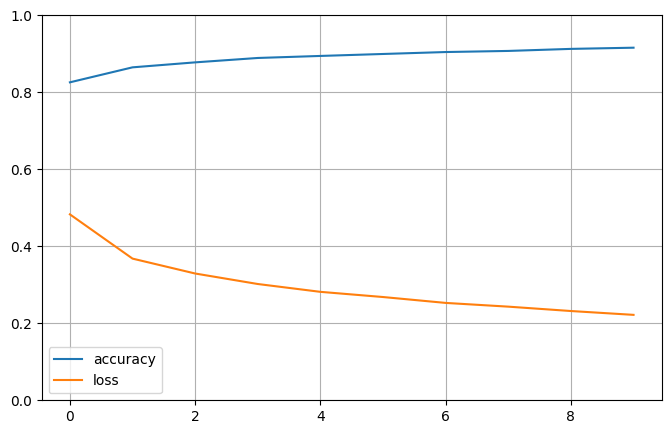

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
probs :  [5.9641541e-05 2.1751816e-06 5.4402549e-06 9.9989349e-01 3.9881243e-06
 1.6969141e-10 3.3188204e-05 7.8942786e-10 1.9838260e-06 4.9494665e-11]
klasa : 3
rzeczywista klasa:  3


In [ ]:
input = tf.keras.Input(shape=X_train.shape[1:])

# możemy wypisać, co ta warstwa przyjmuje - jest to rozmiar
# naszego obrazka bez batch_size (który ma wartość None)
print(input)

# spłaszczenie wejścia
input_flat = layers.Flatten(input_shape=[28,28])(input)

# nasza kolejna warstwa jest typu Dense, jak poprzednio, ale od razu
# i bezpośrednio przekazujemy jej wejście, tak jak funkcji w Pythonie:
hidden_1 =layers.Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 =layers.Dense(150, activation='relu', name="hidden_2")(hidden_1)

# złączamy wyniki z obu warstw za pomocą warstwy typu Concatenate
concat_layer = layers.Concatenate()([input_flat, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# podsumowanie naszego modelu
model_res.summary()

<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=None, name=keras_tensor_46>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_11 (Flatten)      │ (None, 784)            │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hidden_1 (Dense)          │ (None, 320)            │        251,200 │ flatten_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hidden_2 (Dense)          │ (None, 150)            │         48,150 │ hidden_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 934)            │              0 │ flatten_11[0][0],      │
│                           │                        │                │ hidden_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 10)             │          9,350 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 308,700 (1.18 MB)

 Trainable params: 308,700 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
text = np.array([["ala ma kota"]])

input_1 = tf.keras.Input(shape=text.shape[1:])
input_2 = tf.keras.Input(shape=X_train.shape[1:])

# nasza kolejna warstwa jest typu Dense, jak poprzednio,
# ale od razu przekazujemy jej wejście, tak jak funkcji w Pythonie
hidden_1 =layers.Dense(320, activation='relu')(input_1)
hidden_2 =layers.Dense(150, activation='relu')(hidden_1)

# złączamy wyniki naszych warstw za pomocą warstwy
# typu Concatenate podając jako argumenty input_1 oraz hidden_2
concat_layer = layers.Concatenate()([input_1, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

# podsumowanie naszego modelu
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 320)            │            640 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 150)            │         48,150 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 151)            │              0 │ input_layer_9[0][0],   │
│ (Concatenate)             │                        │                │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 10)             │          1,520 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7802 - loss: 0.6133
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8630 - loss: 0.3761
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8748 - loss: 0.3401
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8842 - loss: 0.3127
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8916 - loss: 0.2909
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8947 - loss: 0.2791
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9029 - loss: 0.2597
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9075 - loss: 0.2480
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9080 - loss: 0.2437
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9124 - loss: 0.2322
